# Assignment 5: Complex numbers and Fourier transform

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import cv2
from matplotlib.colors import LogNorm

## Question 1: Complex exponent

Complex exponent is the complex version of the library function `exp`. 

1. Implement complex exponent using real-valued functions from the `numpy` library. Use Euler's formula for the exponent of a complex number.

In [2]:
def cexp(z):
    """computes the  exponent of a complex number or a numpy array of numbers.
    """
    x=z.real
    y=z.imag
    tmp=np.cos(y)+np.sin(y)*np.sqrt(complex(-1))
    ans=np.exp(x)*tmp
    return ans

2. Using [Axes3d.plot_surface](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#surface-plots), plot the real and the imaginary parts of $\exp(z)$ for range $\mathcal{R}(z) \in [-2, 2]$, $\mathcal{I}(z) \in [0, 2\pi]$.

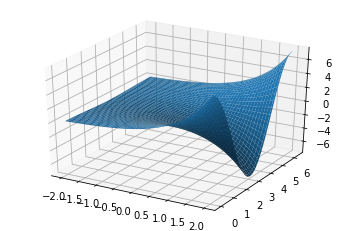

In [3]:
# example wave
x = np.linspace(-2,2,100)
y = np.linspace(0, 2*np.pi, 100)
x_1, y_1 = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
tmp=np.sqrt(complex(-1))
w=cexp((x_1+y_1*tmp))
ax.plot_surface(x_1, y_1, w.real)

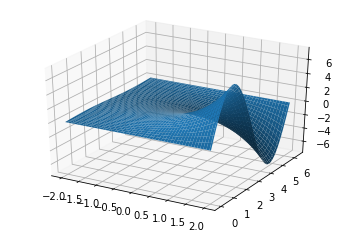

In [4]:
x = np.linspace(-2,2,100)
y = np.linspace(0, 2*np.pi, 100)
x_1, y_1 = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
tmp=np.sqrt(complex(-1))
w=cexp((x_1+y_1*tmp))
ax.plot_surface(x_1, y_1, w.imag)

3. Similarly, plot the magnitude and the phase of $\exp(z)$, for the same range.  
We define the magnitude and phase of $z=a+i\cdot b$:
\begin{align}
        magnitude(z) = \sqrt{a^2+b^2} \\ 
        phase(z) = \arctan({\frac{b}{a}})
    \end{align}
You can use [np.abs](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) and [np.angle](https://numpy.org/doc/stable/reference/generated/numpy.angle.html) to compute those.

In [5]:
#magnitude and the phase functions
def magnitude_func(z):
  return np.abs(z)
def phase_func(z):
  return np.angle(z)

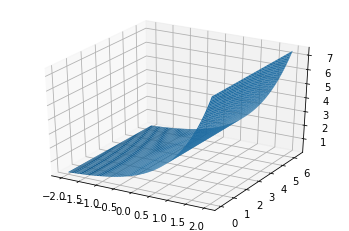

In [6]:

x = np.linspace(-2,2,100)
y = np.linspace(0, 2*np.pi, 100)
x_1, y_1 = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
tmp=np.sqrt(complex(-1))
w=cexp((x_1+y_1*tmp))
ax.plot_surface(x_1, y_1, magnitude_func(w))

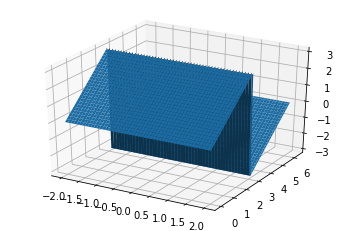

In [7]:
x = np.linspace(-2,2,100)
y = np.linspace(0, 2*np.pi, 100)
x_1, y_1 = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
tmp=np.sqrt(complex(-1))
w=cexp((x_1+y_1*tmp))
ax.plot_surface(x_1, y_1, phase_func(w))

4. Find the maximum and minimum magnitude and phase of $exp(z - \overline z)$ ($\overline z$ is the conjugate of $z$), for the same range.

In [8]:
x=np.linspace(-2, 2,250)
y=np.linspace(0, 2*np.pi,250)
z=x+y*np.sqrt(complex(-1))
ans=np.linspace(-2, 2,200)+((np.linspace(0, 2*np.pi,200)))*1j
Z=z-z.conjugate()

In [9]:
#the maximum and minimum magnitude and phase
phase=np.angle(cexp(Z))
print("phase_ max :" , max(phase))
print("phase_ min :", min(phase))
magnitude=np.abs(cexp(Z))
print("magnitude_ max :", max(magnitude))
print("magnitude_ min :",min(magnitude))

phase_ max : 3.1289758156235687
phase_ min : -3.1289758156235696
magnitude_ max : 1.0
magnitude_ min : 0.9999999999999999


5. Find the maximum and minimum of the real and imaginary parts of $\exp(z\cdot \overline z)$, for the same range.

In [50]:
#values to compute the max/min real/img parts for the same range
x = np.linspace(-2,2,250)
y = np.linspace(0, 2*np.pi,250)
npsqrt=np.sqrt(complex(-1))
a=(x[0]+y[0]*npsqrt)
conj=a.conjugate()
w=((x[0]*conj.real)-(y[0]*conj.imag))
r=(x[0]*conj.imag+y[0]*conj.real)
ans=w+r*npsqrt
ans=cexp(ans)
min_real=ans.real
max_real=ans.real
min_imag=ans.imag
max_imag=ans.imag

In [51]:
# the maximum and minimum of the real and imaginary
i=0
while i < len(y):
  for j in range(len(y)):
    a=(x[i]+y[j]*npsqrt)
    conj=a.conjugate()
    tmp=a.real*conj
    tmp2=a.imag*conj
    cmptt=((tmp.real)-(tmp2.imag))
    ans=cmptt+(tmp.imag+tmp2.real)*npsqrt
    ans=cexp(ans)
    if ans.imag>max_imag:
      max_imag=ans.imag
    if ans.real<min_real:
      min_real=ans.real
    if ans.real>max_real:
      max_real=ans.real
    if ans.imag<min_imag:
      min_imag=ans.imag
  i=i+1


In [52]:
print("max_real :" , max_real)
print("min_real :", min_real)
print("max_imaginary :", max_imag)
print("min_imaginary :",min_imag)

max_real : 7.628459545359256e+18
min_real : 1.0000645171696094
max_imaginary : 0.0
min_imaginary : 0.0


## Question 2: Image processing with Fourier transform

After performing in 2022 student fest, the singer Lena-Lee tried to get back on stage for her encore. Unfortunately she got stuck behind a fence. 
In this exercise we will help Lena-Lee by moving the fence using the Fourier transform. 


*1*. Load and display the provided LenaLee.png

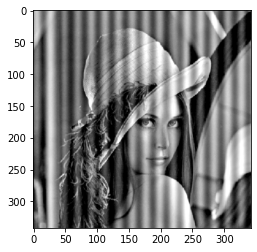

In [ ]:
img = cv2.imread('/LenaLee.png',0) # Reads the original grayscale image
if img is None:
    raise Exception("Couldnt load image, make sure you uploaded it.")
plt.imshow(img,cmap='gray')

2. Compute the image’s DFT using the [numpy.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) function. Shift the zero-frequency component to the center of the spectrum using [numpy.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html). 
*Note* - The fftshift usually used for visualization. Now we can see also the negative frequencies components, and at the center of the image(image.width//2, image.height//2), we can find the zero-frequency component.

In [ ]:
shift=np.fft.fftshift(np.fft.fft2(img))
#shifting 

3. Display the amplitude spectrum of the image.
*Note* - The output of [numpy.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) is complex array, to get the amplitude we use np.abs.  
For visualization it is recommended to display $20 * \log(abs(output)+1)$ instead.   

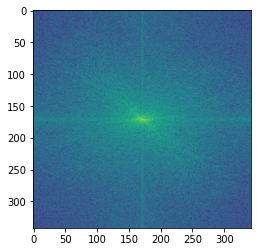

In [ ]:
#Display the image
plt.imshow(20*np.log(abs(shift))+1)

4. Filter out the signal which creates the bars of the fence.  
*Hint 1* - Are the bars have low frequency or high frequency?  
*Hint 2* - A signal is represented with two symmetric points in the spectrum.  
*Hint 3* - As one can see, the sinusoidal noise is horizontal. That means the vertical component of the noise function is zero, and the two points represnting the noise located at the middle row of the image.  

In [ ]:
##from the lecture
def plot_spectrum(im_fft):
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

In [ ]:
##vales
frequencya=0.497
frequencyb=0.489


Text(0.5, 1.0, 'after filterd')

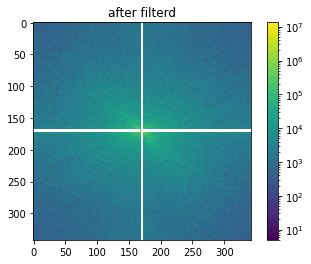

In [ ]:
#Filtering out the signal creates of the fence
changing_img=shift.copy()
row,cul=changing_img.shape
x=int(row*(frequencya))
y=int(row*(1-(frequencya)))
calue_of_frequencya=int(cul*(frequencyb))
changing_img[x:y,:calue_of_frequencya]=0
calue_of_frequencyb=int(row*(1-(frequencyb)))
changing_img[x:y,calue_of_frequencyb:]=0
val=0.49999999
tmp=int(cul*val)
changing_img[:,tmp:int(cul*(1-val))] = 0## also we dont need it 
plt.figure()
plot_spectrum(changing_img)
plt.show
plt.title('after filterd')

5. Apply the inverse DFT on the filtered Fourier spectrum using [numpy.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html) and [numpy.fft.ifftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html). Display the output(for displaying use the absolute value of the image). 

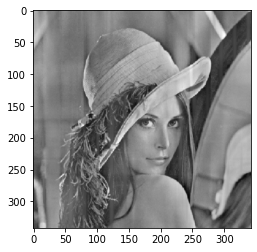

In [ ]:
#the image after removing the lines
photo_after_filtering=np.fft.ifft2(np.fft.ifftshift(changing_img)).real
plt.figure()
#plot
plt.imshow(photo_after_filtering,cmap='gray')